In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ghibtools as gh
import pandas as pd
import seaborn as sns
from params import *

In [3]:
file_path = '/crnldata/cmo/multisite/DATA_MANIP/EEG_Lyon_VJ/Data/raw_data/metadata.xlsx'

In [4]:
metadata = pd.read_excel(file_path)

In [5]:
metadata

,participant,pseudonyme,gender,label_odor+,label_odor-,head_circumference,bonnet,freq_resp_free,ses01,ses02,ses03,ses04,hardest_bloc,payment
0,P01,CM01,F,FO,FM,56.0,56,0.23,odor_sel,odor_-,odor_o,odor_+,Fast,yes
1,P02,DV02,F,V,DiA,56.0,56,0.27,odor_sel,odor_o,odor_+,odor_-,Slow,yes
2,P03,CA03,F,FoE,HeA,54.0,54,0.27,odor_sel,odor_o,odor_-,odor_+,Slow,yes
3,P04,BC04,F,BE,DiA,56.5,56,0.20,odor_sel,odor_+,odor_o,odor_-,Slow,yes
4,P05,ML05,F,PL,HeA,56.0,56,0.25,odor_sel,odor_o,odor_-,odor_+,Fast,yes
5,P06,PE06,F,FO,HeA,54.5,54,0.30,odor_sel,odor_-,odor_+,odor_o,Fast,yes
6,P07,MA07,F,V,Ox,56.0,56,0.29,odor_sel,odor_+,odor_o,odor_-,Fast,yes
7,P08,OK08,F,R,DiA,56.0,56,0.21,odor_sel,odor_o,odor_+,odor_-,Fast,yes
8,P09,SE09,M,V,HeA,55.0,56,0.22,odor_sel,odor_-,odor_+,odor_o,Slow,yes
9,P10,WD10,M,R,HeA,57.0,58,0.26,odor_sel,odor_+,odor_o,odor_-,Fast,yes


Text(0.5, 1.0, '.. on free resp frequency')

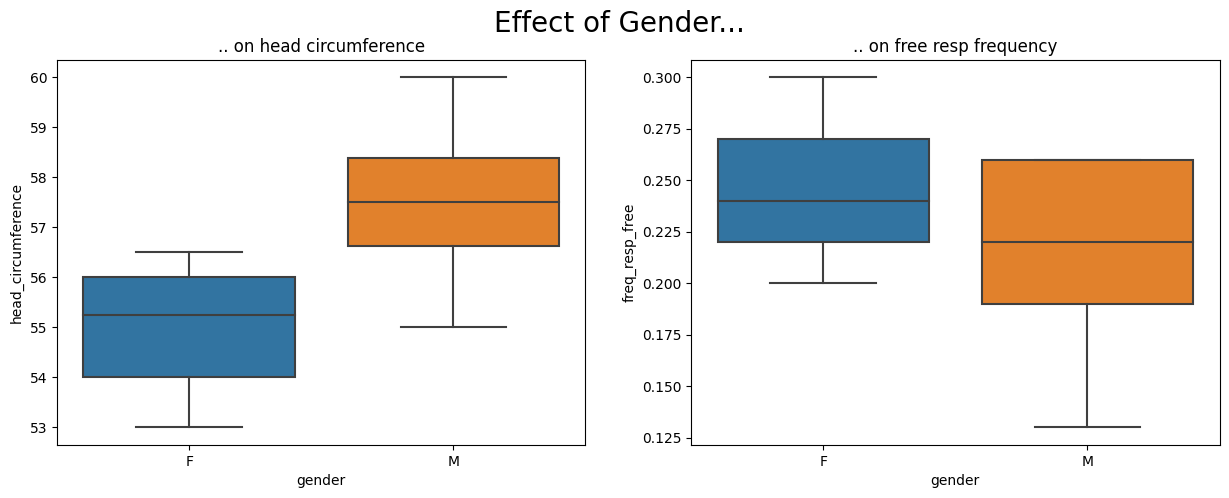

In [8]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,5))
fig.suptitle('Effect of Gender...', fontsize = 20)

ax = axs[0]
sns.boxplot(data=metadata, x = 'gender', y = 'head_circumference', ax=ax)
ax.set_title('.. on head circumference')

ax = axs[1]
sns.boxplot(data=metadata, x = 'gender', y = 'freq_resp_free', ax=ax)
ax.set_title('.. on free resp frequency')

/mnt/autofs/cmo/Etudiants/Valentin_G/ghibtools/ghibtools/stats.py:358: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predictor)
/mnt/autofs/cmo/Etudiants/Valentin_G/ghibtools/ghibtools/stats.py:358: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  estimators = pd.concat([df.groupby(predictor).mean()[outcome].reset_index(), df.groupby(predictor).std()[outcome].reset_index()[outcome].rename('sd')], axis = 1).round(2).set_index(predicto

<AxesSubplot: title={'center': 'Effect of gender on freq_resp_free : ns \n N = 22 values/group * 2 groups \n Mann-Whitney : p-0.2248, CLES : 0.681 (M)'}, xlabel='gender', ylabel='freq_resp_free'>

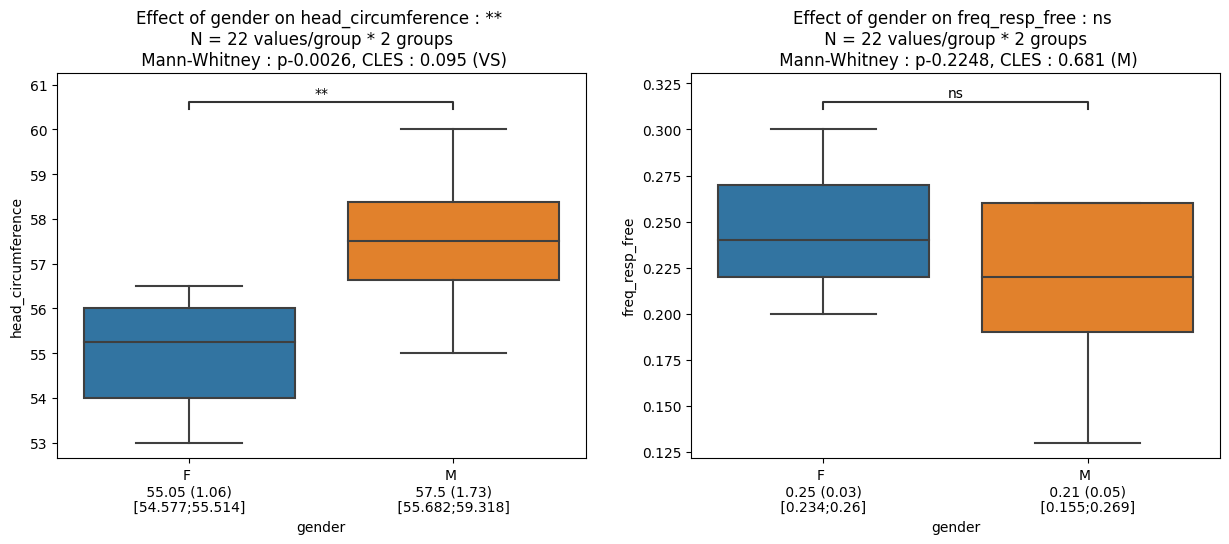

In [7]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,5))

ax = axs[0]
gh.auto_stats(df=metadata, predictor = 'gender', outcome = 'head_circumference', design = 'between', ax=ax) 

ax = axs[1]
gh.auto_stats(df=metadata, predictor = 'gender', outcome = 'freq_resp_free', design = 'between',ax=ax) 